# **`Control De Azúcar En Sangre`**

# **`Librerias`**

In [10]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, mean_squared_error, r2_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# **`Metadatos`**

In [11]:
# Clonamos el repositorio
!git clone https://github.com/LuigiHdez/Modelo_Regresion.git

#cargamos el dataset
data = pd.read_csv('/content/Modelo_Regresion/Hipertension_Arterial_Mexico.csv')

# Cargar los metadatos desde el archivo JSON
with open('/content/Modelo_Regresion/hipertensin-arterial-mxico-metadata.json') as f:
    metadatos_data = json.load(f)

# Iterar sobre los metadatos y mostrarlos
for clave, valor in metadatos_data.items():
    print(clave + ':', valor)

fatal: destination path 'Modelo_Regresion' already exists and is not an empty directory.
@context: {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isEnumeration': 'cr:isEnumeration', 'isLiveDataset': 'cr:isLiveDataset', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 

# **`Preprocesamiento`**

In [12]:
# Mostrar las primeras 5 filas
data.head()

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


In [13]:
# Revisar la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FOLIO_I                           4363 non-null   object 
 1   sexo                              4363 non-null   int64  
 2   edad                              4363 non-null   int64  
 3   concentracion_hemoglobina         4363 non-null   float64
 4   temperatura_ambiente              4363 non-null   int64  
 5   valor_acido_urico                 4363 non-null   float64
 6   valor_albumina                    4363 non-null   float64
 7   valor_colesterol_hdl              4363 non-null   int64  
 8   valor_colesterol_ldl              4363 non-null   float64
 9   valor_colesterol_total            4363 non-null   int64  
 10  valor_creatina                    4363 non-null   float64
 11  resultado_glucosa                 4363 non-null   float64
 12  valor_

In [14]:
data = data.drop('FOLIO_I', axis=1)
data.head()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


# **`Estadística`**

In [59]:
data.describe()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,...,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,1.613339,47.315609,14.228581,21.385973,4.787302,3.868966,36.030254,87.809489,144.138895,0.614573,...,65.789817,153.819940,48.456910,34.061242,19.986340,123.732065,3.239972,22.451292,481.815265,0.645427
std,0.487041,14.445572,1.149723,3.165974,0.820317,0.450879,8.082762,17.530104,28.228483,0.200610,...,7.447041,7.854184,3.488546,4.029785,40.442427,22.608401,2.778287,12.314372,673.702857,0.478438
min,1.000000,4.000000,5.500000,2.000000,0.200000,1.000000,9.000000,11.100000,40.000000,0.060000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000
25%,1.000000,36.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,111.000000,2.000000,19.619493,240.000000,0.000000
50%,2.000000,48.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,121.000000,3.000000,26.229298,380.000000,1.000000
75%,2.000000,58.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,136.000000,4.000000,30.285913,585.000000,1.000000
max,2.000000,93.000000,19.900000,35.000000,11.000000,5.300000,279.000000,303.000000,681.000000,8.270000,...,151.200000,182.600000,97.300000,105.200000,165.000000,200.000000,99.000000,60.513476,17820.000000,1.000000


In [60]:
print(pd.value_counts(data['sexo'], sort = True), '\n')
print(pd.value_counts(data['sueno_horas'], sort = True), '\n')
print(pd.value_counts(data['riesgo_hipertension'], sort = True))

sexo
2    2676
1    1687
Name: count, dtype: int64 

sueno_horas
4     1483
3     1024
2      874
5      527
1      452
99       3
Name: count, dtype: int64 

riesgo_hipertension
1    2816
0    1547
Name: count, dtype: int64


In [61]:
# Datos
x_sexo = ["Female", "Male"]
y_sexo = [2676, 1687]

x_sueno_horas = ["1", "2", "3", "4", "5", "99"]
y_sueno_horas = [452, 874, 1024, 1483, 527, 3]

x_riesgo_hipertension = ["No", "yes"]
y_riesgo_hipertension = [1547, 2816]

colores = ['cyan', 'salmon']

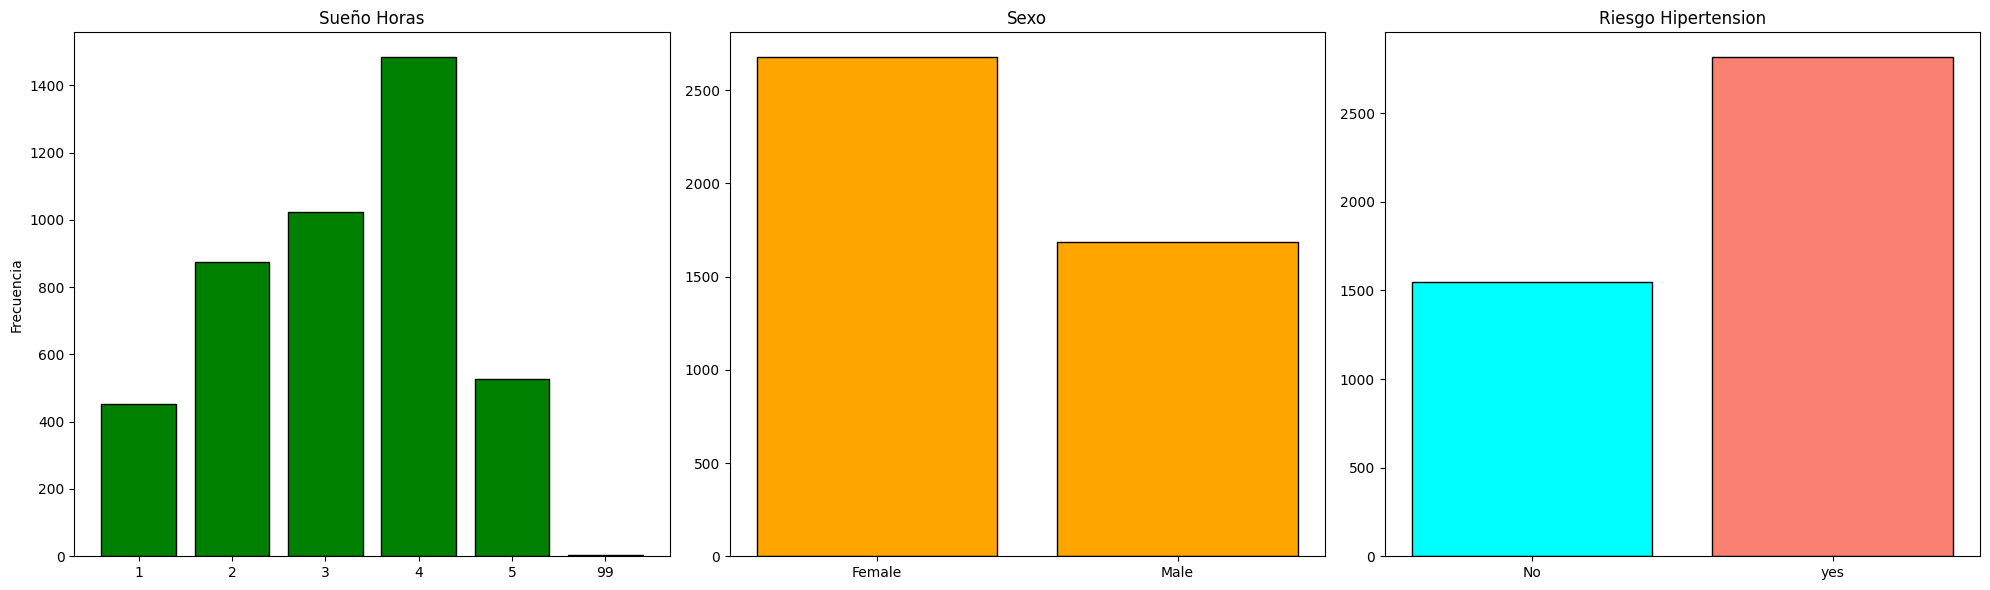

In [62]:
# Crear subplots para cada Gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Gráfico de barras para la columna 'sueno_horas'
axes[0].bar(x = x_sueno_horas, height = y_sueno_horas, color= "green", edgecolor='black')
axes[0].set_title('Sueño Horas')
axes[0].set_ylabel('Frecuencia')

# Gráfico de barras para la columna 'sexo'
axes[1].bar(x = x_sexo, height = y_sexo, color= "orange", edgecolor='black')
axes[1].set_title('Sexo')

# Gráfico de barras para la columna 'riesgo_hipertension'
axes[2].bar(x = x_riesgo_hipertension, height = y_riesgo_hipertension, color= colores, edgecolor='black')
axes[2].set_title('Riesgo Hipertension')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

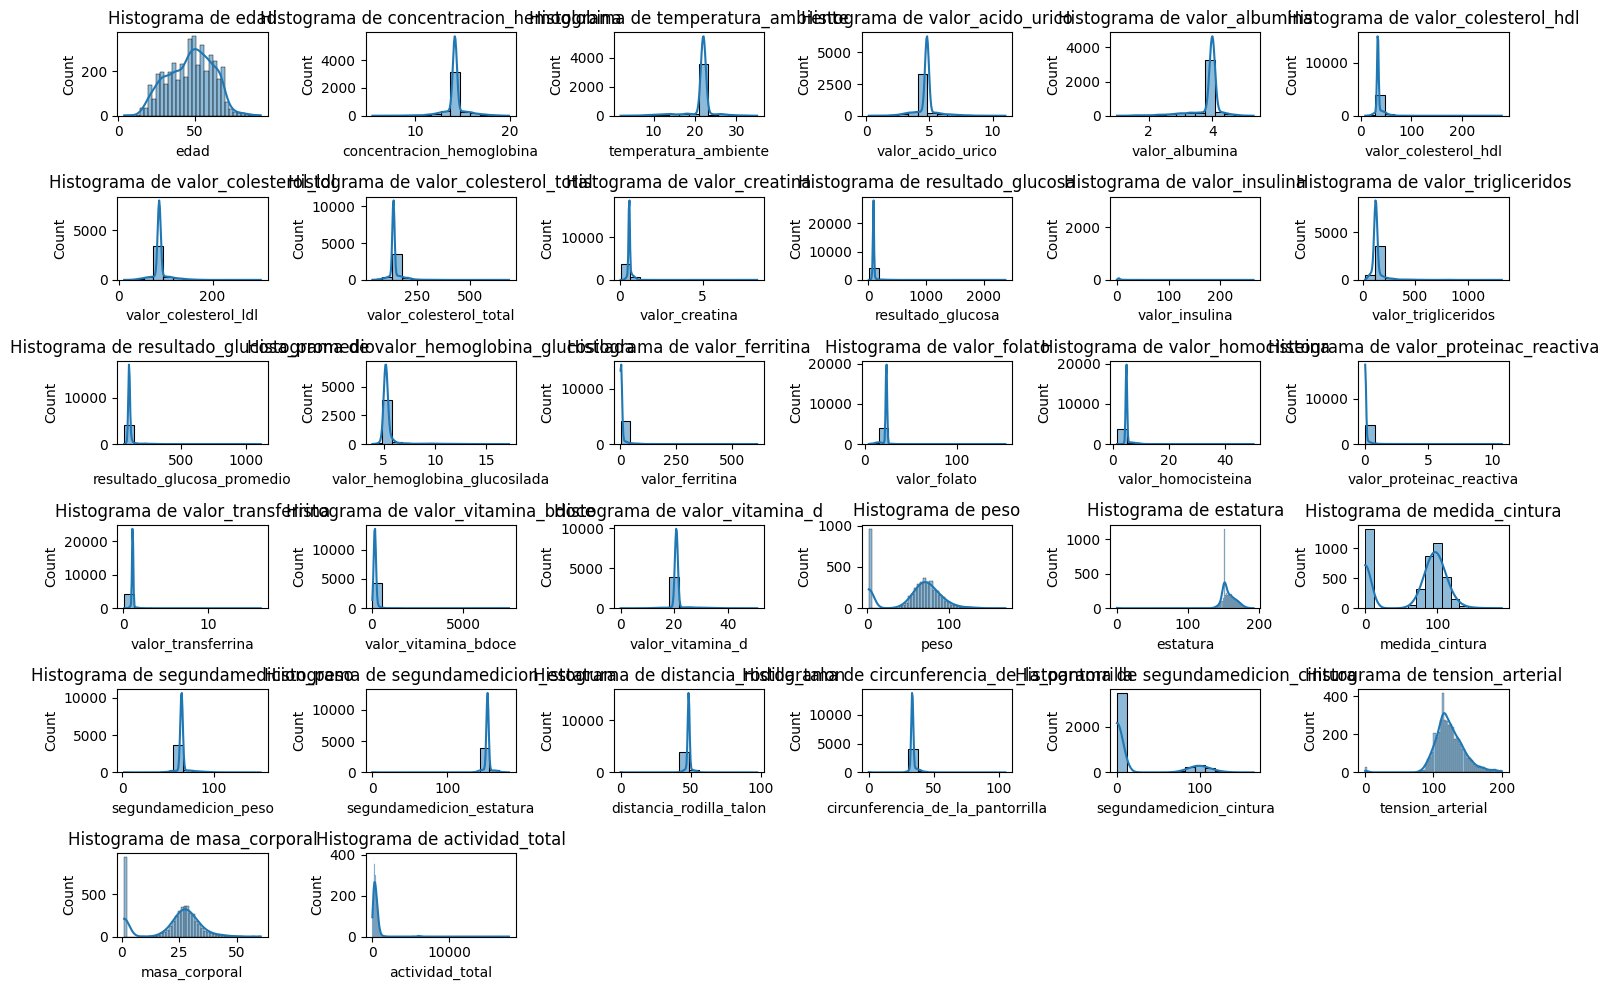

In [63]:
# Excluir las columnas especificadas
excluded_columns = ['sexo', 'sueno_horas', 'riesgo_hipertension']
columns_to_plot = [col for col in data.columns if col not in excluded_columns]

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear histogramas para cada variable
for i, col in enumerate(columns_to_plot):
    plt.subplot(6, 6, i+1)  # Crear un subplot
    sns.histplot(data[col], kde=True)  # Usar kde=True para agregar una estimación de la densidad del kernel
    plt.title(f'Histograma de {col}')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# **`Regresión`**

# **`Decision Tree Regressor`**

## **`Primer Entrenamiento`**

In [108]:
#features = data sin la columna 'resultado_glucosa'
features_tree_regressor = data.drop('resultado_glucosa', axis=1).columns

scaler = MinMaxScaler()

X_tree_regressor = data[features_tree_regressor]    # Features
X_tree_regressor = scaler.fit_transform(X_tree_regressor)

y_tree_regressor = data['resultado_glucosa']  # Target variable

X_train_tree_regressor, X_test_tree_regressor, y_train_tree_regressor, y_test_tree_regressor = train_test_split(X_tree_regressor, y_tree_regressor, test_size=0.2, random_state=101) # 80% training and 20% test

### **`Squared Error`**

In [109]:
# Crear el regresor de árbol de decisión utilizando el criterio 'squared_error'
clf_squared_error_regressor = DecisionTreeRegressor(criterion='squared_error')
clf_squared_error_regressor = clf_squared_error_regressor.fit(X_train_tree_regressor, y_train_tree_regressor)

y_pred_squared_error_train_regressor = clf_squared_error_regressor.predict(X_train_tree_regressor)
y_pred_squared_error_test_regressor = clf_squared_error_regressor.predict(X_test_tree_regressor)

### **`Train Squared Error`**

In [110]:
# Evaluar el modelo
mse_train = mean_squared_error(y_train_tree_regressor, y_pred_squared_error_train_regressor)
r2_train = r2_score(y_train_tree_regressor, y_pred_squared_error_train_regressor)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train}")

Error cuadrático medio en el conjunto de entrenamiento: 0.0
R^2 en el conjunto de entrenamiento: 1.0


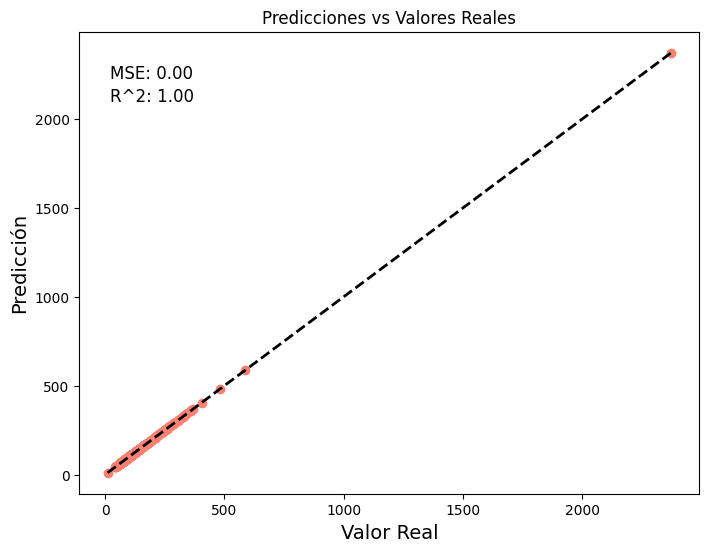

In [111]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_train_tree_regressor, y_pred_squared_error_train_regressor, color='salmon')
plt.plot([y_train_tree_regressor.min(), y_train_tree_regressor.max()], [y_train_tree_regressor.min(), y_train_tree_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real', fontsize=14)
plt.ylabel('Predicción', fontsize=14)
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_train:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_train:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Test Squared Error`**

In [112]:
# Evaluar el modelo
mse_test = mean_squared_error(y_test_tree_regressor, y_pred_squared_error_test_regressor)
r2_test = r2_score(y_test_tree_regressor, y_pred_squared_error_test_regressor)

print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")
print(f"R^2 en el conjunto de prueba: {r2_test}")

Error cuadrático medio en el conjunto de prueba: 452.4693241695303
R^2 en el conjunto de prueba: 0.5210439112322737


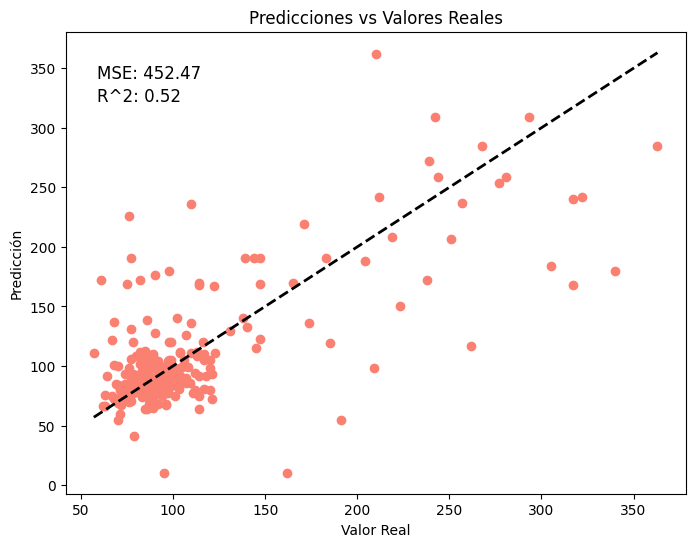

In [113]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_tree_regressor, y_pred_squared_error_test_regressor, color='salmon')
plt.plot([y_test_tree_regressor.min(), y_test_tree_regressor.max()], [y_test_tree_regressor.min(), y_test_tree_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_test:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_test:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Importances Squared Error`**

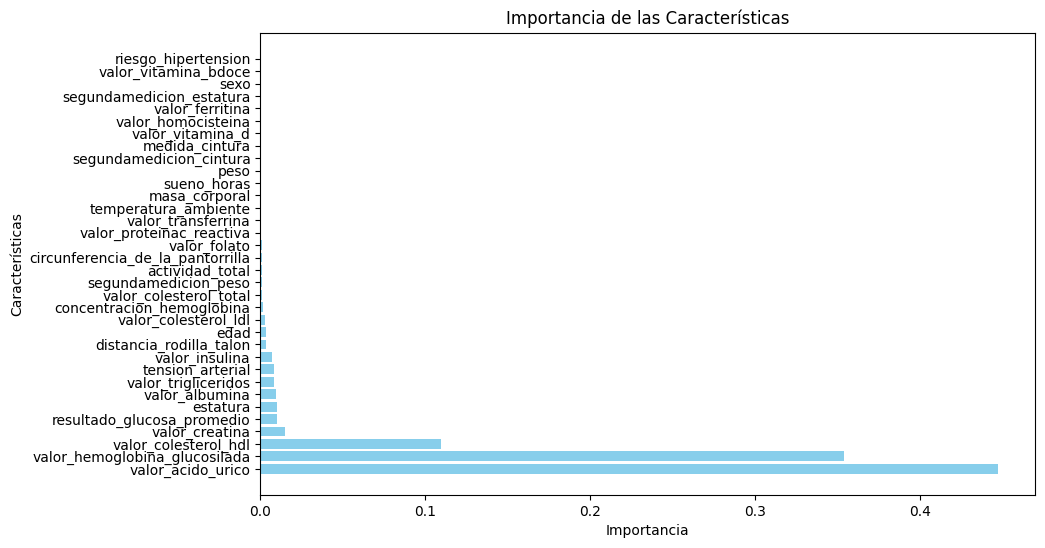

In [114]:
# Obtener las importancias de las características
importances_regressor = clf_squared_error_regressor.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importances_squared_error_regressor = pd.DataFrame({'Feature': features_tree_regressor, 'Importance': importances_regressor})
importances_squared_error_regressor = importances_squared_error_regressor.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importances_squared_error_regressor['Feature'], importances_squared_error_regressor['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

## **`Segundo Entrenamiento`**

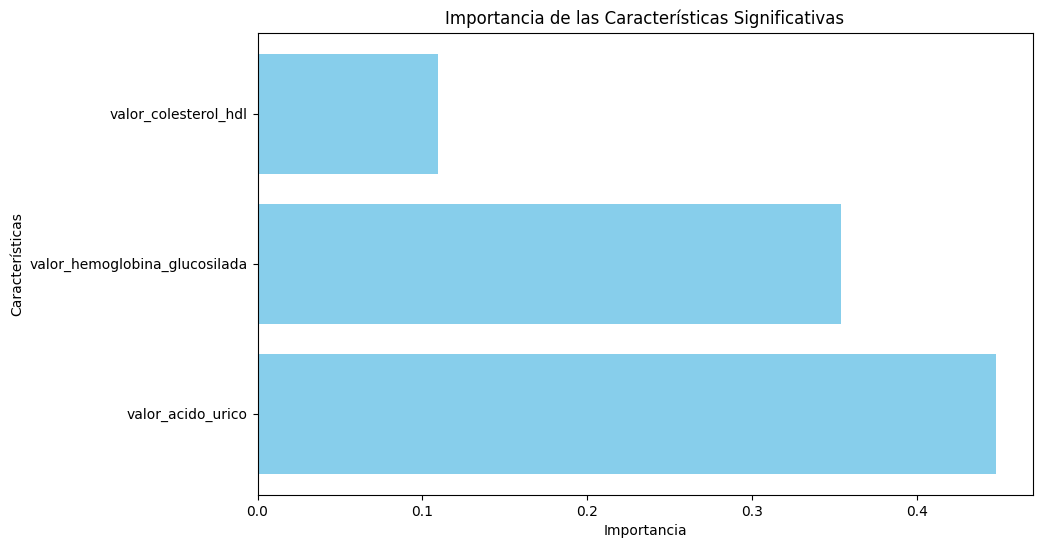

In [115]:
# Establecer el umbral de importancia
umbral_importancia = 0.05  # Puedes ajustar este valor según sea necesario

# Filtrar las características con importancias superiores al umbral
importances_squared_error_regressor = importances_squared_error_regressor[importances_squared_error_regressor['Importance'] > umbral_importancia]

# Visualizar las importancias de las características significativas
plt.figure(figsize=(10, 6))
plt.barh(importances_squared_error_regressor['Feature'], importances_squared_error_regressor['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características Significativas')
plt.show()

In [121]:
features_tree_regressor = importances_squared_error_regressor['Feature'].tolist()
scaler = MinMaxScaler()

X_tree_regressor = data[features_tree_regressor]    # Features
X_tree_regressor = scaler.fit_transform(X_tree_regressor)

y_tree_regressor = data['resultado_glucosa']  # Target variable

X_train_tree_regressor, X_test_tree_regressor, y_train_tree_regressor, y_test_tree_regressor = train_test_split(X_tree_regressor, y_tree_regressor, test_size=0.2, random_state=101) # 80% training and 20% test

### **`Squared Error`**

In [122]:
# Crear el regresor de árbol de decisión utilizando el criterio 'squared_error'
clf_squared_error_regressor = DecisionTreeRegressor(criterion='squared_error')
clf_squared_error_regressor = clf_squared_error_regressor.fit(X_train_tree_regressor, y_train_tree_regressor)

y_pred_squared_error_train_regressor = clf_squared_error_regressor.predict(X_train_tree_regressor)
y_pred_squared_error_test_regressor = clf_squared_error_regressor.predict(X_test_tree_regressor)

## **`Busqueda de hiperparametros`**

In [123]:
# Definir el grid de parámetros
param_grid_regressor = {
    "criterion": ['poisson', 'friedman_mse', 'squared_error'],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros
search_regressor = GridSearchCV(clf_squared_error_regressor, param_grid_regressor, n_jobs=-1, cv=5, scoring='r2')
search_regressor.fit(X_train_tree_regressor, y_train_tree_regressor)

# Mostrar los mejores parámetros y el mejor score
print("Mejor puntuación (CV score=%0.3f):" % search_regressor.best_score_)
print("Mejores parámetros encontrados:")
print(search_regressor.best_params_)

Mejor puntuación (CV score=0.406):
Mejores parámetros encontrados:
{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 2}


## **`Tercer Entrenamiento`**

### **`Friedman Mse`**

In [124]:
# Crear el regresor de árbol de decisión utilizando el criterio 'friedman_mse'
clf_friedman_mse_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_split=2)
clf_friedman_mse_regressor = clf_squared_error_regressor.fit(X_train_tree_regressor, y_train_tree_regressor)

y_pred_friedman_mse_train_regressor = clf_friedman_mse_regressor.predict(X_train_tree_regressor)
y_pred_friedman_mse_test_regressor = clf_friedman_mse_regressor.predict(X_test_tree_regressor)

### **`Train friedman_mse`**

In [125]:
# Evaluar el modelo
mse_train = mean_squared_error(y_train_tree_regressor, y_pred_friedman_mse_train_regressor)
r2_train = r2_score(y_train_tree_regressor, y_pred_friedman_mse_train_regressor)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train}")

Error cuadrático medio en el conjunto de entrenamiento: 0.7713467048710602
R^2 en el conjunto de entrenamiento: 0.9996732995403044


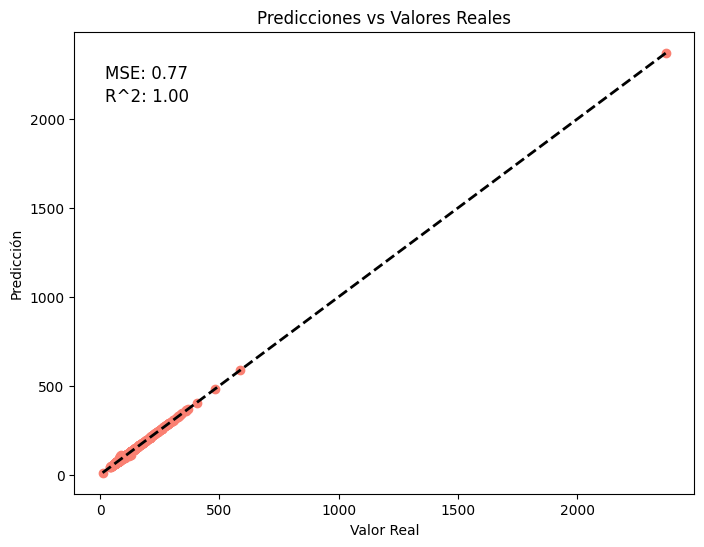

In [127]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_train_tree_regressor, y_pred_friedman_mse_train_regressor, color='salmon')
plt.plot([y_train_tree_regressor.min(), y_train_tree_regressor.max()], [y_train_tree_regressor.min(), y_train_tree_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_train:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_train:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Test Squared Error`**

In [128]:
# Evaluar el modelo
mse_test = mean_squared_error(y_test_tree_regressor, y_pred_friedman_mse_test_regressor)
r2_test = r2_score(y_test_tree_regressor, y_pred_friedman_mse_test_regressor)

print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")
print(f"R^2 en el conjunto de prueba: {r2_test}")

Error cuadrático medio en el conjunto de prueba: 569.0615693012601
R^2 en el conjunto de prueba: 0.39762655954454185


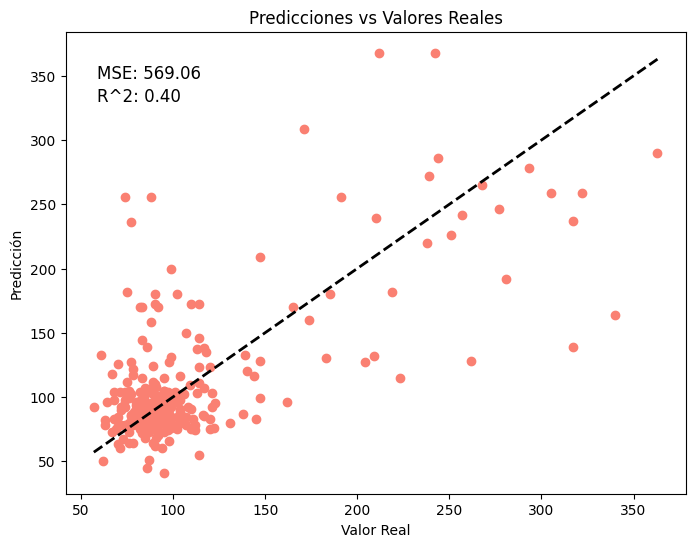

In [129]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_tree_regressor, y_pred_squared_error_test_regressor, color='salmon')
plt.plot([y_test_tree_regressor.min(), y_test_tree_regressor.max()], [y_test_tree_regressor.min(), y_test_tree_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_test:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_test:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

## **`Árbol`**

[Text(0.7897009208961828, 0.9838709677419355, 'x[1] <= 0.391\nsquared_error = 2361.021\nsamples = 3490\nvalue = 96.801'),
 Text(0.5962073829589114, 0.9516129032258065, 'x[1] <= 0.192\nsquared_error = 191.209\nsamples = 3407\nvalue = 92.586'),
 Text(0.3304481253980424, 0.9193548387096774, 'x[0] <= 0.338\nsquared_error = 105.708\nsamples = 3305\nvalue = 91.321'),
 Text(0.07710864771264078, 0.8870967741935484, 'x[2] <= 0.076\nsquared_error = 495.615\nsamples = 235\nvalue = 82.77'),
 Text(0.019240161617357587, 0.8548387096774194, 'x[0] <= 0.227\nsquared_error = 256.833\nsamples = 54\nvalue = 69.019'),
 Text(0.008761673598058224, 0.8225806451612904, 'x[1] <= 0.064\nsquared_error = 49.167\nsamples = 12\nvalue = 54.0'),
 Text(0.007814465641511389, 0.7903225806451613, 'squared_error = 0.0\nsamples = 1\nvalue = 42.0'),
 Text(0.009708881554605059, 0.7903225806451613, 'x[0] <= 0.218\nsquared_error = 39.355\nsamples = 11\nvalue = 55.091'),
 Text(0.008761673598058224, 0.7580645161290323, 'x[0] <= 0

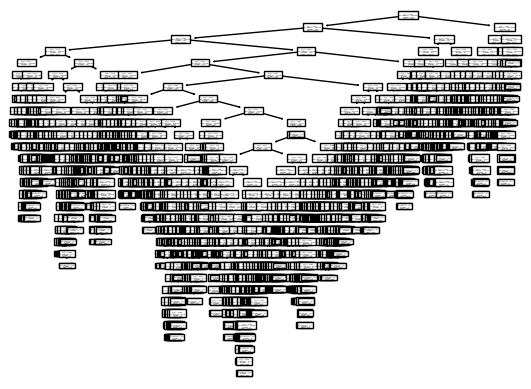

In [130]:
tree.plot_tree(clf_friedman_mse_regressor)

# **`Random Forest Regressor`**

## **`Primer Entrenamiento`**

In [64]:
#features = data sin la columna 'resultado_glucosa'
features_forest_regressor = data.drop('resultado_glucosa', axis=1).columns

scaler = MinMaxScaler()

X_forest_regressor = data[features_forest_regressor]    # Features
X_forest_regressor = scaler.fit_transform(X_forest_regressor)

y_forest_regressor = data['resultado_glucosa']  # Target variable

X_train_forest_regressor, X_test_forest_regressor, y_train_forest_regressor, y_test_forest_regressor = train_test_split(X_forest_regressor, y_forest_regressor, test_size=0.2, random_state=101) # 80% training and 20% test

### **`Squared Error`**

In [65]:
# Crear el random forest utilizando el criterio 'squared_error'
clf_squared_error_forest_regressor = RandomForestRegressor(criterion='squared_error')
clf_squared_error_forest_regressor = clf_squared_error_forest_regressor.fit(X_train_forest_regressor, y_train_forest_regressor)

y_pred_squared_error_train_forest_regressor = clf_squared_error_forest_regressor.predict(X_train_forest_regressor)
y_pred_squared_error_test_forest_regressor = clf_squared_error_forest_regressor.predict(X_test_forest_regressor)

### **`Train Squared Error`**

In [66]:
# Evaluar el modelo
mse_train = mean_squared_error(y_train_forest_regressor, y_pred_squared_error_train_forest_regressor)
r2_train = r2_score(y_train_forest_regressor, y_pred_squared_error_train_forest_regressor)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train}")

Error cuadrático medio en el conjunto de entrenamiento: 237.0022743312321
R^2 en el conjunto de entrenamiento: 0.8996187427988553


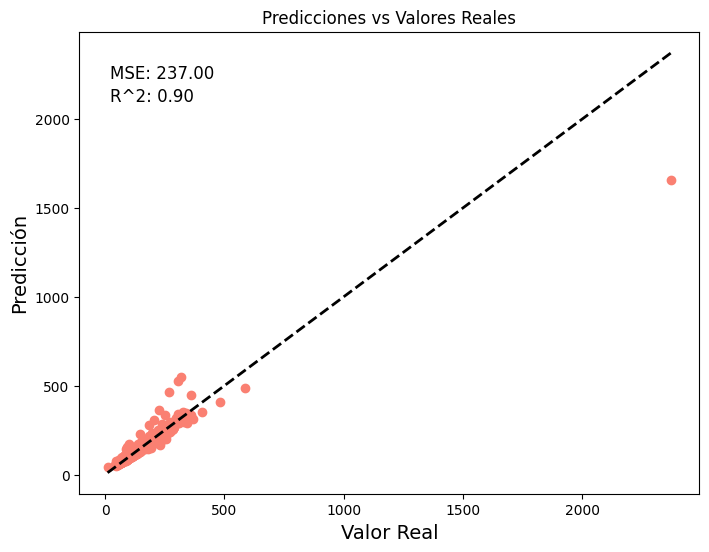

In [67]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_train_forest_regressor, y_pred_squared_error_train_forest_regressor, color='salmon')
plt.plot([y_train_forest_regressor.min(), y_train_forest_regressor.max()], [y_train_forest_regressor.min(), y_train_forest_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real', fontsize=14)
plt.ylabel('Predicción', fontsize=14)
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_train:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_train:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Test Squared Error`**

In [68]:
# Evaluar el modelo
mse_test = mean_squared_error(y_test_forest_regressor, y_pred_squared_error_test_forest_regressor)
r2_test = r2_score(y_test_forest_regressor, y_pred_squared_error_test_forest_regressor)

print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")
print(f"R^2 en el conjunto de prueba: {r2_test}")

Error cuadrático medio en el conjunto de prueba: 433.27896103550967
R^2 en el conjunto de prueba: 0.5413576447335953


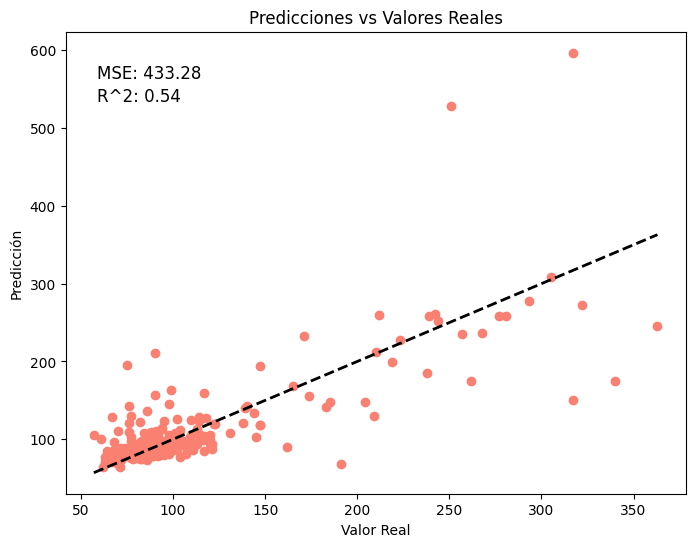

In [69]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_forest_regressor, y_pred_squared_error_test_forest_regressor, color='salmon')
plt.plot([y_test_forest_regressor.min(), y_test_forest_regressor.max()], [y_test_forest_regressor.min(), y_test_forest_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_test:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_test:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Importances Squared Error`**

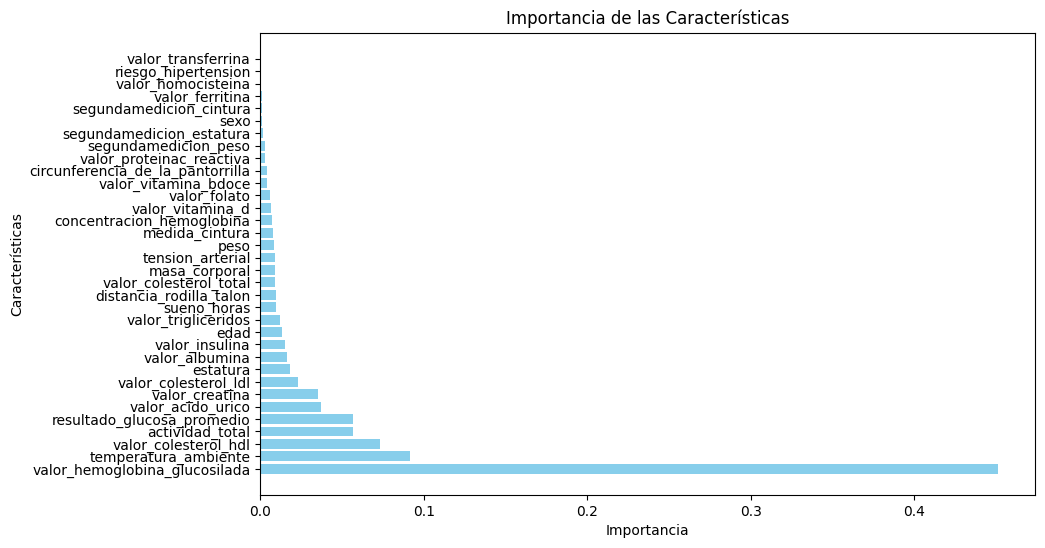

In [70]:
# Obtener las importancias de las características
importances_forest_regressor = clf_squared_error_forest_regressor.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importances_squared_error_forest_regressor = pd.DataFrame({'Feature': features_forest_regressor, 'Importance': importances_forest_regressor})
importances_squared_error_forest_regressor = importances_squared_error_forest_regressor.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importances_squared_error_forest_regressor['Feature'], importances_squared_error_forest_regressor['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

## **`Segundo Entrenamiento`**

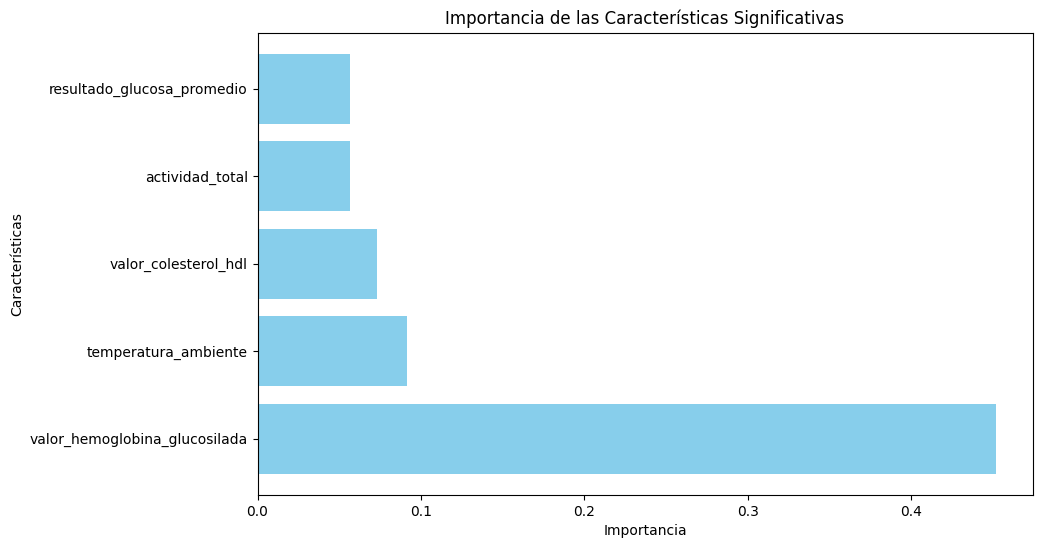

In [71]:
# Establecer el umbral de importancia
umbral_importancia = 0.05  # Puedes ajustar este valor según sea necesario

# Filtrar las características con importancias superiores al umbral
importances_squared_error_forest_regressor = importances_squared_error_forest_regressor[importances_squared_error_forest_regressor['Importance'] > umbral_importancia]

# Visualizar las importancias de las características significativas
plt.figure(figsize=(10, 6))
plt.barh(importances_squared_error_forest_regressor['Feature'], importances_squared_error_forest_regressor['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características Significativas')
plt.show()

In [72]:
features_forest_regressor = importances_squared_error_forest_regressor['Feature'].tolist()

scaler = MinMaxScaler()

X_forest_regressor = data[features_forest_regressor]    # Features
X_forest_regressor = scaler.fit_transform(X_forest_regressor)

y_forest_regressor = data['resultado_glucosa']  # Target variable

X_train_forest_regressor, X_test_forest_regressor, y_train_forest_regressor, y_test_forest_regressor = train_test_split(X_forest_regressor, y_forest_regressor, test_size=0.2, random_state=101) # 80% training and 20% test

### **`Squared Error`**

In [73]:
# Crear el random forest utilizando el criterio 'squared_error'
clf_squared_error_forest_regressor = RandomForestRegressor(criterion='squared_error')
clf_squared_error_forest_regressor = clf_squared_error_forest_regressor.fit(X_train_forest_regressor, y_train_forest_regressor)

y_pred_squared_error_train_forest_regressor = clf_squared_error_forest_regressor.predict(X_train_forest_regressor)
y_pred_squared_error_test_forest_regressor = clf_squared_error_forest_regressor.predict(X_test_forest_regressor)

## **`Busqueda de hiperparametros`**

In [74]:
# Definir el grid de parámetros
param_grid_forest_regressor = {
    "criterion": ['poisson', 'friedman_mse', 'squared_error'],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros
search_forest_regressor = GridSearchCV(clf_squared_error_forest_regressor, param_grid_forest_regressor, n_jobs=-1, cv=5, scoring='r2')
search_forest_regressor.fit(X_train_forest_regressor, y_train_forest_regressor)

# Mostrar los mejores parámetros y el mejor score
print("Mejor puntuación (CV score=%0.3f):" % search_forest_regressor.best_score_)
print("Mejores parámetros encontrados:")
print(search_forest_regressor.best_params_)

Mejor puntuación (CV score=0.368):
Mejores parámetros encontrados:
{'criterion': 'poisson', 'max_depth': 20, 'min_samples_split': 2}


## **`Tercer Entrenamiento`**

### **`Poisson`**

In [75]:
# Crear el random forest utilizando el criterio 'poisson'
clf_poisson_forest_regressor = RandomForestRegressor(criterion='poisson', max_depth=20, min_samples_split=2)
clf_poisson_forest_regressor = clf_poisson_forest_regressor.fit(X_train_forest_regressor, y_train_forest_regressor)

y_pred_poisson_train_forest_regressor = clf_poisson_forest_regressor.predict(X_train_forest_regressor)
y_pred_poisson_test_forest_regressor = clf_poisson_forest_regressor.predict(X_test_forest_regressor)

### **`Train Poisson`**

In [76]:
# Evaluar el modelo
mse_train = mean_squared_error(y_train_forest_regressor, y_pred_poisson_train_forest_regressor)
r2_train = r2_score(y_train_forest_regressor, y_pred_poisson_train_forest_regressor)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train}")

Error cuadrático medio en el conjunto de entrenamiento: 297.60793848385805
R^2 en el conjunto de entrenamiento: 0.8739494838083343


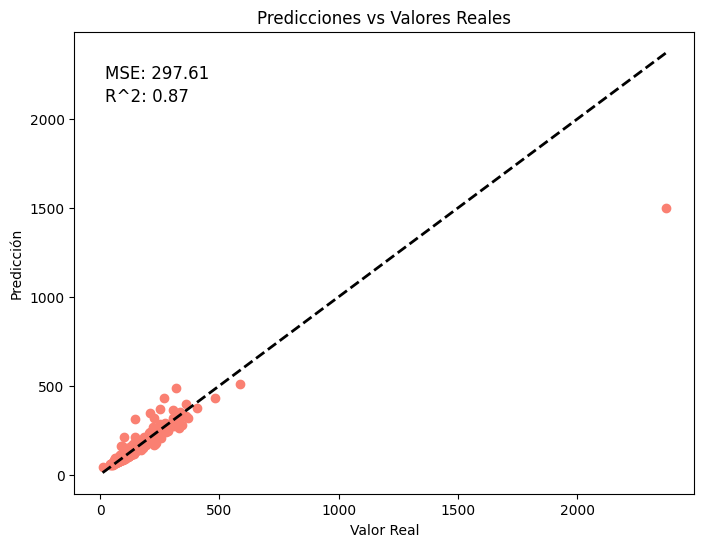

In [77]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_train_forest_regressor, y_pred_poisson_train_forest_regressor, color='salmon')
plt.plot([y_train_forest_regressor.min(), y_train_forest_regressor.max()], [y_train_forest_regressor.min(), y_train_forest_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_train:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_train:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

### **`Test Poisson`**

In [78]:
# Evaluar el modelo
mse_test = mean_squared_error(y_test_forest_regressor, y_pred_poisson_test_forest_regressor)
r2_test = r2_score(y_test_forest_regressor, y_pred_poisson_test_forest_regressor)

print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")
print(f"R^2 en el conjunto de prueba: {r2_test}")

Error cuadrático medio en el conjunto de prueba: 600.3278702086036
R^2 en el conjunto de prueba: 0.3645299839472861


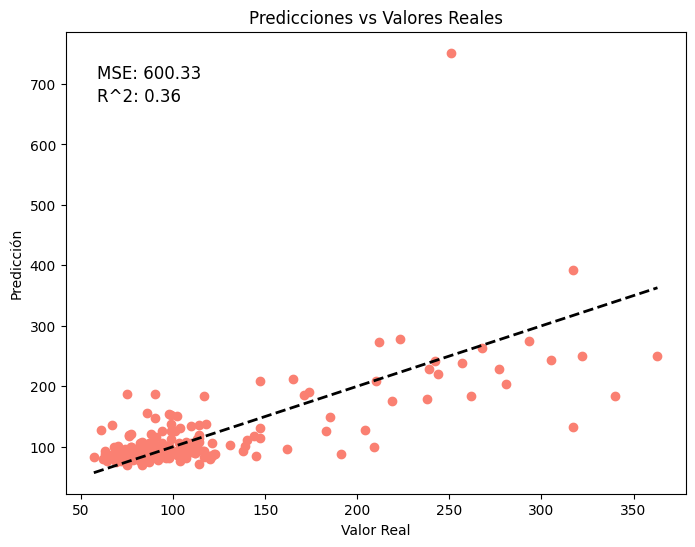

In [79]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_forest_regressor, y_pred_poisson_test_forest_regressor, color='salmon')
plt.plot([y_test_forest_regressor.min(), y_test_forest_regressor.max()], [y_test_forest_regressor.min(), y_test_forest_regressor.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Agregar anotaciones de texto para MSE y R^2
plt.text(0.05, 0.9, f'MSE: {mse_test:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R^2: {r2_test:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

## **`Forest`**

In [80]:
print(f"Número de árboles: {len(clf_poisson_forest_regressor.estimators_)}")

Número de árboles: 100


In [84]:
# Desactivar las advertencias
warnings.filterwarnings('ignore', message="X has feature names, but RandomForestRegressor was fitted without feature names")

idx0 = 18
new_x = X_test_forest_regressor[idx0:idx0+1]  # Pasamos una matriz de tamaño 1 x num_features
print(f"Nivel de glucosa real: {y_test_forest_regressor[idx0]}, Predicción: {y_pred_poisson_test_forest_regressor[idx0]}")

predicciones = []
for dt in clf_poisson_forest_regressor.estimators_:
    predicted_glucose = dt.predict(new_x)[0]
    predicciones.append(predicted_glucose)

print(f"Las primeras 10 predicciones: {predicciones[:10]}")

# ---- Estadísticas del bosque de regresión ----

mean_glucose_prediction = np.mean(predicciones)
median_glucose_prediction = np.median(predicciones)
std_deviation_glucose_prediction = np.std(predicciones)

print(f"Media de las predicciones de glucosa: {mean_glucose_prediction}")
print(f"Mediana de las predicciones de glucosa: {median_glucose_prediction}")
print(f"Desviación estándar de las predicciones de glucosa: {std_deviation_glucose_prediction}")

Nivel de glucosa real: 92.0, Predicción: 91.99981697478968
Las primeras 10 predicciones: [92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0]
Media de las predicciones de glucosa: 91.99981697478968
Mediana de las predicciones de glucosa: 92.0
Desviación estándar de las predicciones de glucosa: 0.0014533608997541671


In [85]:
dt = clf_poisson_forest_regressor.estimators_[5]

print(f"Profundidad del árbol: {dt.get_depth()}")
print(f"Número de hojas del árbol: {dt.get_n_leaves()}")

text_representation = tree.export_text(decision_tree=dt, feature_names=features_forest_regressor)

Profundidad del árbol: 20
Número de hojas del árbol: 655


In [86]:
print(text_representation)

|--- valor_hemoglobina_glucosilada <= 0.36
|   |--- valor_hemoglobina_glucosilada <= 0.19
|   |   |--- valor_colesterol_hdl <= 0.07
|   |   |   |--- valor_colesterol_hdl <= 0.05
|   |   |   |   |--- valor_hemoglobina_glucosilada <= 0.17
|   |   |   |   |   |--- temperatura_ambiente <= 0.56
|   |   |   |   |   |   |--- temperatura_ambiente <= 0.44
|   |   |   |   |   |   |   |--- valor_hemoglobina_glucosilada <= 0.12
|   |   |   |   |   |   |   |   |--- actividad_total <= 0.02
|   |   |   |   |   |   |   |   |   |--- value: [90.00]
|   |   |   |   |   |   |   |   |--- actividad_total >  0.02
|   |   |   |   |   |   |   |   |   |--- valor_hemoglobina_glucosilada <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [62.00]
|   |   |   |   |   |   |   |   |   |--- valor_hemoglobina_glucosilada >  0.10
|   |   |   |   |   |   |   |   |   |   |--- actividad_total <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |   |   |   |   |   |--- activi